[(98, 408, 253, 253)]
parametry częsci twarzy
left eye [(39, 53), (46, 48), (55, 48), (64, 55), (55, 55), (46, 55)]
right eye [(100, 55), (108, 49), (117, 49), (126, 55), (118, 56), (109, 56)]
nose tip [(67, 93), (73, 96), (81, 99), (89, 96), (96, 94)]
nose bridge [(82, 50), (82, 62), (81, 73), (81, 85)]
top lip [(49, 115), (60, 111), (72, 110), (81, 111), (89, 110), (101, 112), (111, 117), (107, 118), (89, 114), (81, 115), (72, 114), (53, 116)]
bottom lip [(111, 117), (101, 129), (90, 135), (80, 136), (71, 135), (59, 128), (49, 115), (53, 116), (71, 125), (81, 126), (90, 126), (107, 118)]
lewe oko zdj


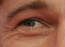

prawe oko zdj


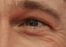

nos


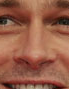

usta


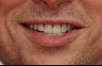

In [138]:
import dlib
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
import os

cwd = os.getcwd()
inputDir = cwd + "/input"

# image = face_recognition.load_image_file(inputDir + "/angelina_jolie/angela.jpg")
image = face_recognition.load_image_file(inputDir + "/brad_pitt/brad.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
# display(pil_face_image)
# print(face_locations)
face_landmarks_list = face_recognition.face_landmarks(face_image, model='large')

for face_landmarks in face_landmarks_list:
    print("parametry częsci twarzy")
    print('left eye', face_landmarks['left_eye']) #6
    print('right eye', face_landmarks['right_eye']) #6
    print('nose tip', face_landmarks['nose_tip']) #5
    print('nose bridge', face_landmarks['nose_bridge']) #4
    print('top lip', face_landmarks['top_lip']) #12
    print('bottom lip', face_landmarks['bottom_lip']) #12
    
# encoding -> czy jestesmy w stanie porownac oko z okiem i sensownie to pokazać  
# jak bysmy np dali tylko czesc encoding do wyliczenia odleglosci euklidseowej

def get_outmost_coordinates(feature_coordinates):
    # TODO: zabezpieczyc na wypadek wyjscia poza picture, np. twarz jest w rogu zdjecia 
    # trzeba sprawdzic czy -/+ wychodzi poza size, jak tak to wziac wartosc z .size)
    
    padding = 20
    return {
        'left': min(feature_coordinates, key=lambda e: e[0])[0] - padding,
        'top': min(feature_coordinates, key=lambda e: e[1])[1] - padding,
        'right': max(feature_coordinates, key=lambda e: e[0])[0] + padding,
        'bottom': max(feature_coordinates, key=lambda e: e[1])[1] + padding,
    }

def crop_feature(face_landmarks, feature, image):
    if not np.isscalar(feature):
        all_coordinates = {}
        for f in feature:
            all_coordinates[f] = get_outmost_coordinates(face_landmarks[f])
        
        coordinates = {
            'left': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['left'])]['left'],
            'top': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['top'])]['top'],
            'right': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['right'])]['right'],
            'bottom': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['bottom'])]['bottom'],
        }
    else: 
        coordinates = get_outmost_coordinates(face_landmarks[feature])
    
    return image.crop(tuple(coordinates.values()))

print("lewe oko zdj")
leftEye = crop_feature(face_landmarks, feature = 'left_eye', image = pil_face_image)
display(leftEye)

print("prawe oko zdj")
rightEye = crop_feature(face_landmarks, feature = 'right_eye', image = pil_face_image)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks, feature = ['nose_bridge', 'nose_tip'], image = pil_face_image)
display(nose)

print("usta")
lips = crop_feature(face_landmarks, feature = ['top_lip', 'bottom_lip'], image = pil_face_image)
display(lips)

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(162, 356), (169, 395), (178, 431), (191, 466), (208, 500), (232, 528), (261, 551), (292, 569), (327, 570), (362, 560), (392, 538), (419, 511), (439, 480), (450, 444), (453, 407), (454, 371), (454, 333)]
The left_eyebrow in this face has the following points: [(188, 340), (204, 323), (228, 317), (254, 319), (279, 323)]
The right_eyebrow in this face has the following points: [(322, 320), (348, 311), (375, 307), (401, 310), (419, 325)]
The nose_bridge in this face has the following points: [(303, 339), (306, 363), (309, 387), (312, 413)]
The nose_tip in this face has the following points: [(284, 427), (299, 431), (316, 435), (332, 427), (345, 419)]
The left_eye in this face has the following points: [(219, 352), (233, 344), (249, 342), (264, 348), (250, 353), (234, 356)]
The right_eye in this face has the following points: [(346, 341), (359, 333), (375, 333), (390, 340), (376, 344), (361, 344)]
The to

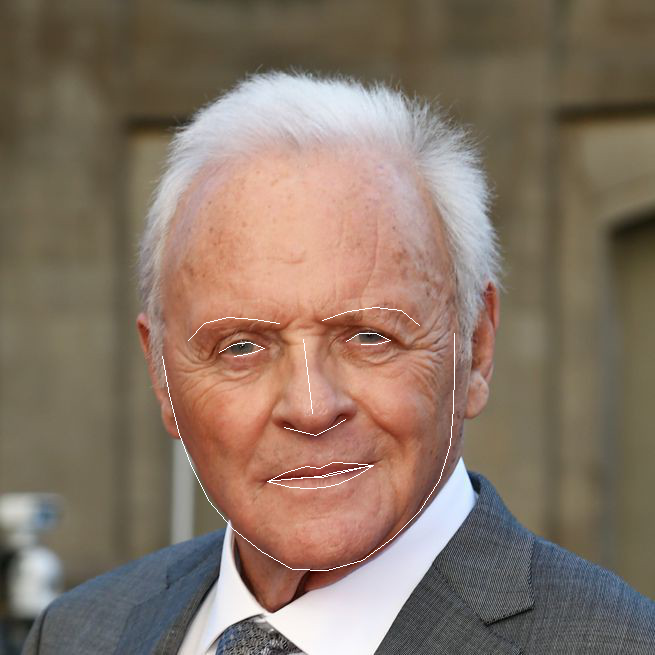

In [105]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
# image = face_recognition.load_image_file(inputDir + "/john_cenax.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!  
    for facial_feature in face_landmarks.keys():
#         if facial_feature == 'left_eye':
#             d.line((face_landmarks[facial_feature][0],face_landmarks[facial_feature][3]), width=3)
#             d.line((face_landmarks[facial_feature][5],face_landmarks[facial_feature][2]), width=3)
        d.line(face_landmarks[facial_feature], width=1)

# Show the picture
display(pil_image)

# for face_landmarks in face_landmarks_list:
#     d = ImageDraw.Draw(pil_image, 'RGBA')

#     # Make the eyebrows into a nightmare
#     d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
#     d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
#     d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
#     d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

#     # Gloss the lips
#     d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
#     d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
#     d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
#     d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

#     # Sparkle the eyes
#     d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
#     d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

#     # Apply some eyeliner
#     d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
#     d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

#     display(pil_image)

# for face_location in face_locations:
#     top, right, bottom, left = face_location
    
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     display(pil_image) 
#